In [93]:
library('igraph')
library('Matrix')
library('pracma')

In [94]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [95]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    count_node_freq = numeric(1000)
    for(i in 1:num_steps){
        # if(count_node_freq[v]==0)
        count_node_freq[v]<- count_node_freq[v]+1
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
    }
    return(count_node_freq)
}

In [96]:
g<-barabasi.game(n=1000, m = 4, directed=TRUE)
summary(g)

IGRAPH 7942c5d D--- 1000 3990 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)


In [97]:
# PART (a) : Finding Probability of visiting node
# VERSION 1: Finding probabilities of all nodes
x <- sample(1:1000, 1000, replace=T) # no of random walks
tm<-create_transition_matrix(g)
final_count_node_freq<-numeric(1000)
t<-2000 # timesteps of a random walk
for(start in x)
{
    final_count_node_freq <- final_count_node_freq + random_walk(g,t,start,tm)
}

final_count_node_prob <- final_count_node_freq/sum(final_count_node_freq)

In [98]:
disp('Probability of walker visiting each node')
disp(final_count_node_prob)

Probability of walker visiting each node 
0.993208 0.000956 0.000612 0.000424 0.000304 0.000342 0.00017 7.6e-05 0.000196 4.4e-05 8e-06 4e-05 1.4e-05 9e-05 0.000118 3.4e-05 6e-06 2.8e-05 4e-06 3e-05 4e-06 2e-06 5.4e-05 1.6e-05 2e-06 2.8e-05 2e-06 2.4e-05 2.4e-05 6e-06 1e-05 2e-05 1.6e-05 3e-05 1.4e-05 4e-06 1.2e-05 1.8e-05 1.4e-05 1.4e-05 2e-06 4e-06 1.8e-05 0 1e-05 6e-06 2.2e-05 2e-06 3.6e-05 6e-06 1.6e-05 6e-06 8e-06 8e-06 2.6e-05 0 8e-06 2.8e-05 2.8e-05 6e-06 2.8e-05 0 1e-05 8e-06 6e-06 4e-06 8e-06 4e-06 1.4e-05 8e-06 2e-06 1e-05 1e-05 1.2e-05 6e-06 1.6e-05 2e-06 6e-06 4e-06 2e-06 1.6e-05 2e-05 0 6e-06 1.4e-05 2e-06 8e-06 1.2e-05 0 6e-06 0 6e-06 2e-06 1.4e-05 4e-06 4e-06 2e-06 6e-06 8e-06 8e-06 2.4e-05 4e-06 2e-06 4e-06 6e-06 4e-06 6e-06 4e-06 2e-06 4e-06 1e-05 2e-06 2e-06 2e-06 1e-05 8e-06 2.2e-05 6e-06 6e-06 0 1e-05 6e-06 4e-06 4e-06 0 1e-05 2e-06 2e-06 2e-06 2e-06 4e-06 0 4e-06 1.4e-05 4e-06 8e-06 1.2e-05 4e-06 0 0 8e-06 4e-06 4e-06 2e-06 0 1.2e-05 4e-06 0 6e-06 2e-06 4e-06 2e-06 

Correlation between degree and visit probability:  0.484165

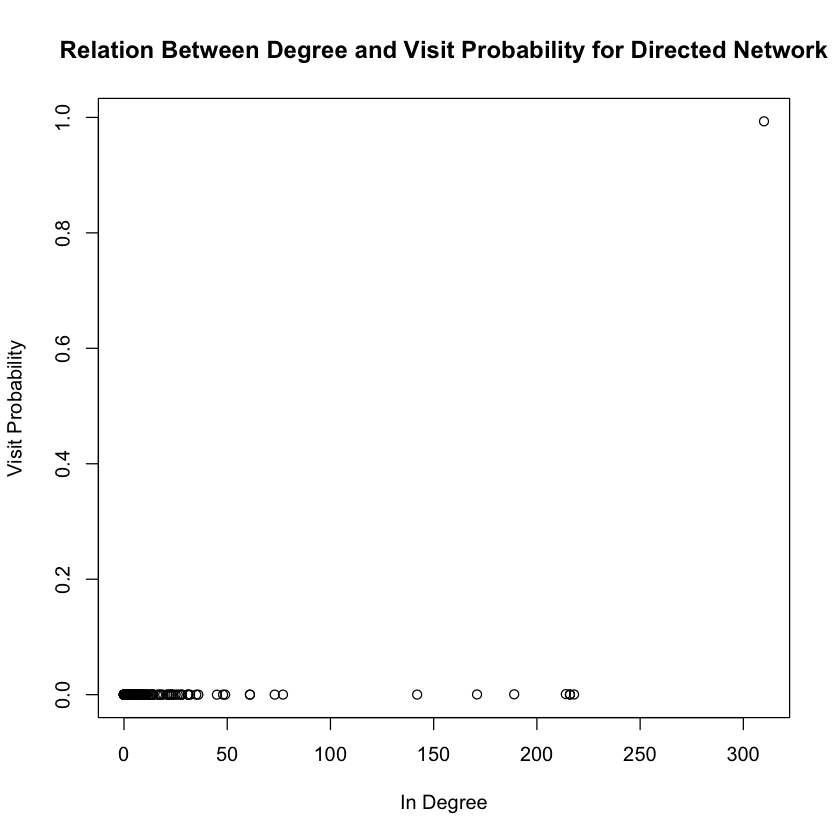

In [99]:
network_degree = degree(g, mode="in")
visit_probability = final_count_node_prob
relationship = cor(network_degree, visit_probability)
cat("Correlation between degree and visit probability: ", relationship)

plot_data = rbind(network_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  #order by degree
plot(plot_data[1,], plot_data[2,], xlab = "In Degree", ylab = "Visit Probability", main = "Relation Between Degree and Visit Probability for Directed Network")

In [102]:
# PART (a) : Finding Probability of visiting node
# VERSION 2: Finding probability of the last node in steady state

random_walk_v2 = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    count_node_freq = numeric(1000)
    for(i in 1:num_steps){
        if(count_node_freq[v]==0)
            count_node_freq[v]=1
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
    }
    return(v)
}

x <- sample(1:1000, 1000, replace=T) # no of random walks
tm<-create_transition_matrix(g)
final_count_node_freq<-numeric(1000)
t<-2000 # timesteps of a random walk
for(start in x)
{
    node <- random_walk_v2(g,t,start,tm)
    final_count_node_freq[node] <- final_count_node_freq[node]+1
}

final_count_node_prob <- final_count_node_freq/1000
disp('Probability of walker visiting each node')
disp(final_count_node_prob)

Probability of walker visiting each node 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

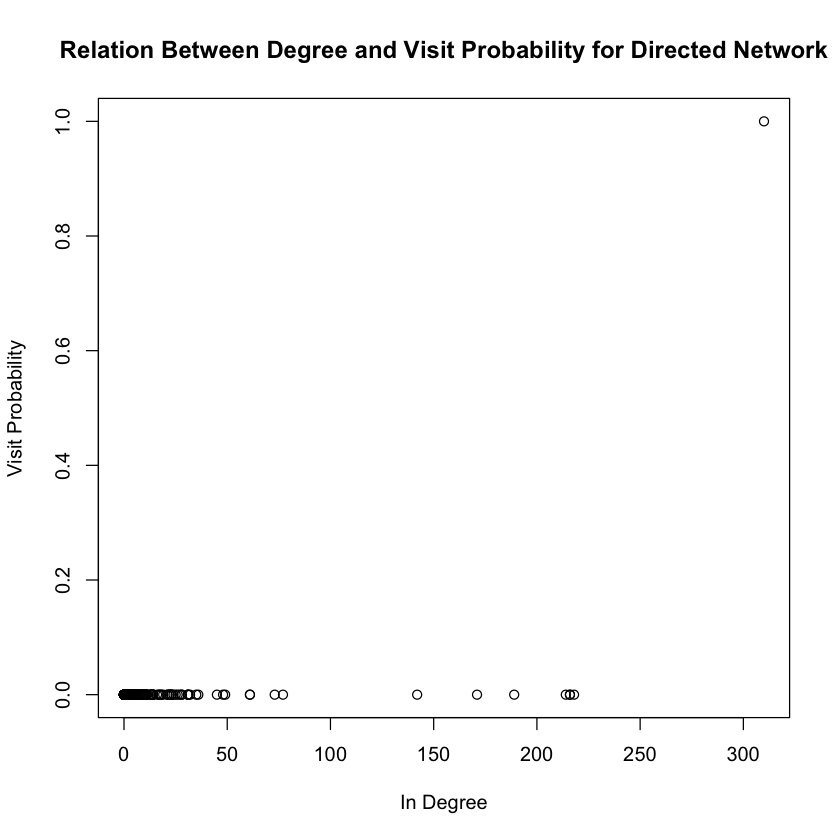

In [103]:
network_degree = degree(g, mode="in")
visit_probability = final_count_node_prob

plot_data = rbind(network_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  # order by degree
plot(plot_data[1,], plot_data[2,], xlab = "In Degree", ylab = "Visit Probability", main = "Relation Between Degree and Visit Probability for Directed Network")

In [105]:
# PART (b) : With Teleportation Finding Probability of visiting node
# VERSION 1: Finding probabilities of all nodes

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    count_node_freq = numeric(1000)
    for(i in 1:num_steps){
        alpha <- sample(seq(0, 1, by=0.05), size = 1, replace = TRUE)
        if(alpha<=0.15){ # Teleportation
            count_node_freq[v] <- count_node_freq[v]+1
            v <- sample(1:1000, 1, replace=T)
        }
        else{ # Transition Matrix
            # if(count_node_freq[v]==0)
            count_node_freq[v] <- count_node_freq[v]+1
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)
        }
        
    }
    return(count_node_freq)
}

x <- sample(1:1000, 1000, replace=T) # no of random walks
tm<-create_transition_matrix(g)
final_count_node_freq<-numeric(1000)
t<-2000 # timesteps of a random walk
for(start in x)
{
    final_count_node_freq <- final_count_node_freq + random_walk(g,t,start,tm)
}

final_count_node_prob <- final_count_node_freq/sum(final_count_node_freq)
disp('Probability of walker visiting each node')
disp(final_count_node_prob)

Probability of walker visiting each node 
0.601026 0.044344 0.030204 0.018474 0.016392 0.019438 0.010004 0.00454 0.012762 0.00365 0.000506 0.001924 0.001366 0.004552 0.005398 0.001708 0.00071 0.001336 0.000684 0.001434 0.000224 0.000368 0.003322 0.00167 0.000192 0.001946 0.000244 0.001902 0.00152 0.000538 0.000346 0.001332 0.000886 0.001366 0.001224 0.000274 0.000828 0.001348 0.00094 0.000636 0.000136 0.000172 0.000674 0.00029 0.000546 0.001104 0.001492 0.000248 0.002658 0.000426 0.000618 0.00039 0.000626 4e-04 0.001464 0.000196 0.00095 0.001196 0.0015 0.000304 0.001664 0.000154 0.000742 0.000532 0.000434 0.000532 0.000656 9.6e-05 0.000928 0.000482 0.000262 0.000526 0.000322 0.000646 0.000368 0.00119 0.000354 0.000258 0.000166 0.000158 0.000502 0.00082 0.000162 0.000234 0.000396 0.000208 0.000534 0.000288 0.000162 0.000344 0.000156 0.000432 0.000204 0.000784 0.000232 0.000208 0.000176 0.000196 0.000292 0.00056 0.000782 0.000248 0.000182 2e-04 0.00028 0.000406 0.000348 0.000608 0.00013 

Correlation between degree and visit probability:  0.5635956

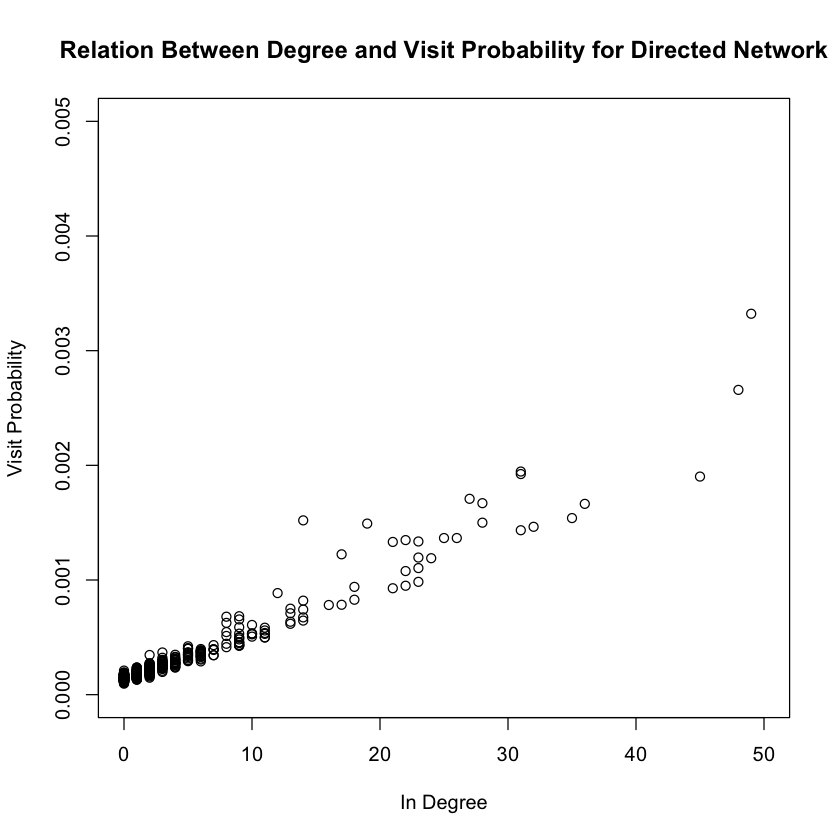

In [106]:
network_degree = degree(g, mode="in")
visit_probability = final_count_node_prob
relationship = cor(network_degree, visit_probability)
cat("Correlation between degree and visit probability: ", relationship)

plot_data = rbind(network_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  # order by degree
plot(plot_data[1,], plot_data[2,], ylim = c(0, 0.005), xlim=c(0,50), xlab = "In Degree", ylab = "Visit Probability", main = "Relation Between Degree and Visit Probability for Directed Network")

In [107]:
# PART (b) : With Teleportation Finding Probability of visiting node
# VERSION 2: Finding probability of the last node in steady state

random_walk_v2 = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    count_node_freq = numeric(1000)
    for(i in 1:num_steps){
        alpha <- sample(seq(0, 1, by=0.05), size = 1, replace = TRUE)
        if(alpha<=0.15){ # Teleportation
            count_node_freq[v]<- count_node_freq[v]+1
            v <- sample(1:1000, 1, replace=T)
        }
        else{
        # if(count_node_freq[v]==0)
        count_node_freq[v]<- count_node_freq[v]+1
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)
        }
    }
    return(v)
}

x <- sample(1:1000, 1000, replace=T) # no of random walks
tm<-create_transition_matrix(g)
final_count_node_freq<-numeric(1000)
t<-2000 # timesteps of a random walk
for(start in x)
{
    node <- random_walk_v2(g,t,start,tm)
    final_count_node_freq[node] <- final_count_node_freq[node]+1
}

final_count_node_prob <- final_count_node_freq/sum(final_count_node_freq)
disp('Probability of walker visiting each node')
disp(final_count_node_prob)

Probability of walker visiting each node 
0.592 0.041 0.029 0.02 0.025 0.022 0.011 0.008 0.009 0.001 0 0.002 0 0.005 0.006 0.001 0.001 0.004 0 0.004 0 0 0.004 0 0 0.003 0 0.003 0.002 0.001 0 0.002 0.001 0 0 0.001 0.001 0 0 0.002 0 0 0.001 0 0 0.002 0 0 0.001 0 0.001 0 0.001 0 0.002 0 0.004 0.002 0.001 0 0 0 0 0 0 0.003 0.001 0 0.001 0 0.001 0 0 0 0 0.002 0 0.001 0 0 0 0 0 0 0 0 0 0 0 0.002 0 0 0 0 0 0 0 0 0.002 0 0 0 0 0 0 0 0.001 0 0 0 0 0 0 0 0.001 0 0.004 0.001 0 0.001 0.001 0 0.001 0 0 0.002 0 0.001 0.001 0 0 0 0 0.001 0 0.001 0 0.001 0 0 0 0 0 0.001 0 0.003 0 0 0 0 0.001 0 0.001 0 0 0 0 0 0 0 0 0.001 0.002 0 0 0 0 0 0 0 0.001 0.001 0.001 0 0 0 0 0.001 0 0 0 0 0 0 0 0.001 0 0 0 0 0.001 0.001 0 0 0 0.001 0 0 0 0.001 0 0 0 0.002 0 0 0.001 0 0 0 0 0 0 0 0 0 0.001 0 0 0.001 0 0 0.001 0 0 0 0 0 0 0 0.001 0 0 0 0 0 0 0 0 0.001 0 0 0 0.001 0.001 0 0 0 0 0 0 0.001 0.001 0 0.001 0 0 0 0 0 0 0 0.001 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.001 0 0 0 0.001 0 0.002 0 0 0 0 0.001 0.001 0 0.001

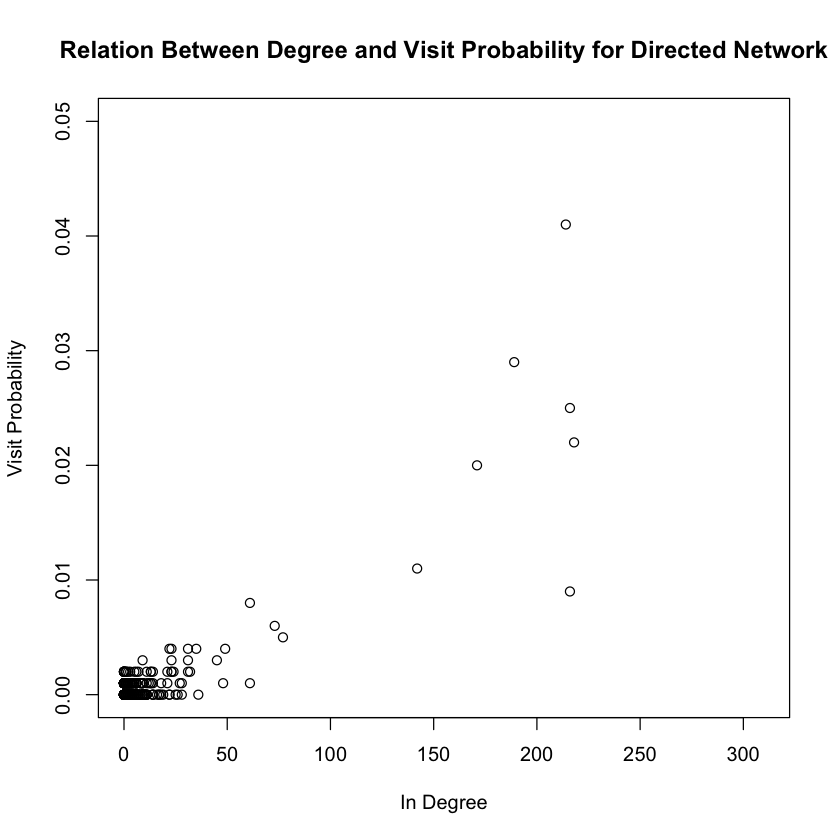

In [109]:
network_degree = degree(g, mode="in")
visit_probability = final_count_node_prob

plot_data = rbind(network_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  # order by degree
plot(plot_data[1,], plot_data[2,], ylim = c(0, 0.05), xlab = "In Degree", ylab = "Visit Probability", main = "Relation Between Degree and Visit Probability for Directed Network")